In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:
        print(e)

In [2]:
"""

This is for morphological classification of galaxies by CNN,
By Kenji Bekki, on 2017/11/15
Revised on 2020/2/14 (Nair & Abraham 2010)
For test only.

"""


import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from keras.models import model_from_json
import keras.callbacks
import numpy as np
#import keras.backend.tensorflow_backend as KTF
#import tensorflow as tf
import os.path


### Original values
#batch_size = 128
#num_classes = 10
#epochs = 12
#batch_size = 200

num_classes = 2
num_classes0 = 2

#epochs = 1
#nb_epoch=epochs

n_mesh=50

img_rows, img_cols = n_mesh, n_mesh
n_mesh2=n_mesh*n_mesh-1
n_mesh3=n_mesh*n_mesh

#input_shape = (img_rows, img_cols, 1)

# For output the galaxy classification results
f1=open('test27d.out','w')

nmodel=2000

In [3]:
# This is for simlation data sets
#GD_W_DISC_PATH = "galaxy_data_including_disc/m1.dir/"
#GD_WO_DISC_PATH = "galaxy_data_without_disc/m1.dir/"

GD_FV = "2dfv_test_split.dat"
DATA_PART_NMODEL = int(nmodel/2)


def load_data(path, filename):
    return np.genfromtxt(os.path.join(path, filename), autostrip=True, max_rows=nmodel*n_mesh3)

x_test = load_data("", GD_FV)

ntest = int(x_test.size / n_mesh3)

x_test = x_test.reshape(ntest, img_rows, img_cols, 1)

In [4]:

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

#y_vec=np.zeros(3)
#y_vec=np.zeros(num_classes)
y_vec=np.zeros(num_classes)
#print(y_vec)

y_pred=loaded_model.predict(x_test)
print(y_pred[:ntest])

f1.write( str(ntest) + "\n" )

for i in range(ntest):
#  for j in range(num_classes0):
  for j in range(num_classes):
    y_vec[j]=y_pred[i,j]
#  print(y_vec)
#    print(j)
  y_type=np.argmax(y_vec)
#  y_type=y_type+1
  prob=y_vec[y_type]
  print('i=',i,'G-type=',y_type,'P',prob)
#  Original  type-1 is output
  f1.write( str(y_type) + ' ' + str(y_vec[0]) + ' '+
  str(y_vec[1]) + "\n" )
#  f1.write( str(y_type) +
#   "\n" )
f1.flush()

#loaded_model.compile(loss=keras.losses.categorical_crossentropy,
#              optimizer=keras.optimizers.Adadelta(),
#              metrics=['accuracy'])




Loaded model from disk
[[0.501235   0.498765  ]
 [0.5176777  0.4823223 ]
 [0.5149793  0.48502073]
 [0.51521957 0.48478046]
 [0.51824206 0.48175797]
 [0.51536655 0.48463348]
 [0.49909928 0.50090075]
 [0.5024928  0.4975072 ]
 [0.51511353 0.48488647]
 [0.5123562  0.48764372]
 [0.5153663  0.48463365]
 [0.51543176 0.48456824]
 [0.51498175 0.4850182 ]
 [0.5176749  0.4823251 ]
 [0.49402076 0.5059792 ]
 [0.5161482  0.4838518 ]
 [0.49883336 0.50116664]
 [0.517033   0.48296705]
 [0.50522304 0.49477693]
 [0.51498127 0.4850187 ]
 [0.49586725 0.5041327 ]
 [0.51511425 0.48488572]
 [0.515368   0.48463196]
 [0.5002677  0.4997323 ]
 [0.48868155 0.51131845]
 [0.49327806 0.506722  ]
 [0.5182414  0.4817586 ]
 [0.4993756  0.50062436]
 [0.50303817 0.4969618 ]
 [0.49647924 0.5035207 ]
 [0.51603156 0.4839684 ]
 [0.49765828 0.50234175]
 [0.5154303  0.48456976]
 [0.49387106 0.5061289 ]
 [0.49836954 0.5016304 ]
 [0.5026165  0.49738348]
 [0.5026219  0.4973781 ]
 [0.49852657 0.5014735 ]
 [0.5050739  0.49492612]
 [

i= 321 G-type= 1 P 0.5046544671058655
i= 322 G-type= 0 P 0.5161985158920288
i= 323 G-type= 0 P 0.5151137113571167
i= 324 G-type= 0 P 0.5176777839660645
i= 325 G-type= 0 P 0.51543128490448
i= 326 G-type= 0 P 0.5062990188598633
i= 327 G-type= 0 P 0.5170332193374634
i= 328 G-type= 0 P 0.5061631798744202
i= 329 G-type= 0 P 0.501091480255127
i= 330 G-type= 1 P 0.5039267539978027
i= 331 G-type= 0 P 0.5152186155319214
i= 332 G-type= 0 P 0.5151137113571167
i= 333 G-type= 0 P 0.5004531145095825
i= 334 G-type= 0 P 0.5182414650917053
i= 335 G-type= 0 P 0.5063915252685547
i= 336 G-type= 1 P 0.500367283821106
i= 337 G-type= 1 P 0.501613974571228
i= 338 G-type= 0 P 0.502921998500824
i= 339 G-type= 0 P 0.5019994974136353
i= 340 G-type= 1 P 0.5038188099861145
i= 341 G-type= 1 P 0.5058955550193787
i= 342 G-type= 0 P 0.5160327553749084
i= 343 G-type= 0 P 0.5161474943161011
i= 344 G-type= 0 P 0.5151118040084839
i= 345 G-type= 0 P 0.5123499035835266
i= 346 G-type= 1 P 0.5001377463340759
i= 347 G-type= 1 P

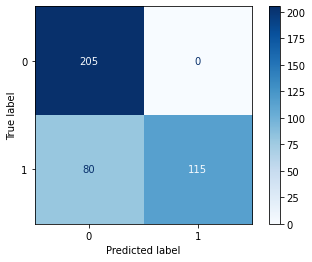

In [5]:
from sklearn import metrics

true_data = np.loadtxt('2dftn_test_split.dat')
predicted_data = np.loadtxt('test27d.out', skiprows=1, usecols=(0))
#print(y_pred)


metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(true_data, predicted_data)).plot(cmap='Blues')

In [6]:
import pandas as pd
df = pd.DataFrame(true_data)
df.value_counts()

0.0    205
1.0    195
dtype: int64